# K-Long Spectra

In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import h5py

from hazma import decay
import utils
from utils import MK0, MPI, MPI0, MMU, ME
from utils import ThreeBodyPhaseSpace

from hazma.decay import charged_pion as dnde_cp
from hazma.decay import neutral_pion as dnde_np
from hazma.decay import muon as dnde_mu

In [2]:
# =========================================================
# ---- K-Long Branching Ratios ----------------------------
# =========================================================

BR_KL_TO_PI0_PI0_PI0 = 0.1952    # BR(π0, π0, π0) = (19.52±0.12 ) %
BR_KL_TO_PI_PI_PI0 = 0.1254      # BR(π+, π−, π0) = (12.54±0.05 ) %
BR_KL_TO_PI_E_NUE = 0.4055       # BR(π±, e∓, νe) = (40.55±0.11 ) %
BR_KL_TO_PI_MU_NUMU = 0.2704     # BR(π±, μ∓, νμ) =  (27.04±0.07 ) %
# --- Sub-percent ------------------------------------------------------------
BR_KL_TO_PI_PI = 0.001967        # BR(π+, π−) = ( 1.967±0.010)×10−3
BR_KL_TO_PI0_PI0 = 0.000864      # BR(π0, π0) = ( 8.64±0.06 )×10−4
BR_KL_TO_A_A = 0.000547          # BR(γ, γ) = ( 5.47±0.04 )×10−4
BR_KL_TO_PI0_PI_E_NU = 0.0000520 # BR(π0, π±, e∓, ν) = ( 5.20±0.11 )×10−5
BR_KL_TO_PI_E_E_E_NU = 0.0000126 # BR(π±, e∓, ν, e+, e−) = ( 1.26±0.04 )×10−5

### $K_{L} \to \pi^{0} + \pi^{0} + \pi^{0}$

The matrix element for $K_{L} \to \pi^{0} + \pi^{0} + \pi^{0}$ comes from the weak Chiral lagrangian:
\begin{align*}
    \mathcal{L} \supset \mathrm{Tr}\left(\lambda_{6}
    \left(\partial_{\mu}U\right)^{\dagger}\left(\partial_{\mu}U\right)
    \right)
\end{align*}
The amplitude is:
\begin{align*}
    \mathcal{A} &\propto 
    -p_{1}\cdot p_{2} - p_{1}\cdot p_{3} - p_{1}\cdot p_{4}
    + p_{2}\cdot p_{3} + p_{2}\cdot p_{4} + p_{3}\cdot p_{4}
    = -m_{\pi^{0}}^2 - \frac{1}{3}m_{K^{0}}^2
\end{align*}

In [5]:
# We only care about the s and t dependence, not the magnitude.

def msqrd_kl_to_pi0_pi0_pi0(s, t):
    return 1.0

tbps = ThreeBodyPhaseSpace(MK0, MPI0, MPI0, MPI0, msqrd_kl_to_pi0_pi0_pi0)
kl_to_pi0_pi0_pi0_edists = tbps.energy_distributions(25, maxiter=1000)
kl_to_pi0_pi0_pi0_s_dist = tbps.invariant_mass_distribution(1, 2, 25, maxiter=1000)
kl_to_pi0_pi0_pi0_t_dist = tbps.invariant_mass_distribution(0, 2, 25, maxiter=1000)
kl_to_pi0_pi0_pi0_u_dist = tbps.invariant_mass_distribution(0, 1, 25, maxiter=1000)

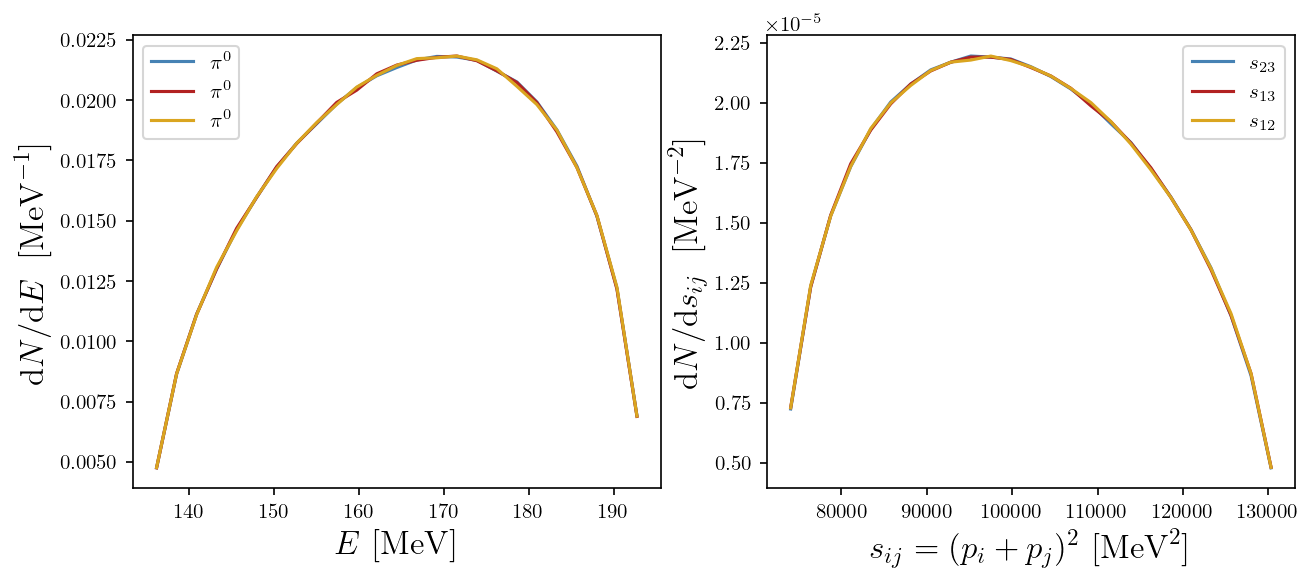

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(10,4))

labels = [r"$\pi^{0}$", r"$\pi^{0}$", r"$\pi^{0}$"]
for (cs, ps), label in zip(kl_to_pi0_pi0_pi0_edists, labels):
    axes[0].plot(cs, ps, label=label)

axes[0].legend()
axes[0].set_ylabel(r"$\dv*{N}{E} \ [\mathrm{MeV}^{-1}]$", fontdict={'size': 16})
axes[0].set_xlabel(r"$E \ [\mathrm{MeV}]$", fontdict={'size': 16})

labels = [r"$s_{23}$", r"$s_{13}$", r"$s_{12}$"]
dists = [kl_to_pi0_pi0_pi0_s_dist, kl_to_pi0_pi0_pi0_t_dist, kl_to_pi0_pi0_pi0_u_dist]
for (cs, ps), label in zip(dists, labels):
    axes[1].plot(cs, ps, label=label)

axes[1].set_ylabel(r"$\dv*{N}{s_{ij}} \ [\mathrm{MeV}^{-2}]$", fontdict={'size': 16})
axes[1].set_xlabel(r"$s_{ij} = (p_{i} + p_{j})^{2} \ [\mathrm{MeV}^{2}]$", fontdict={'size': 16})
axes[1].legend()

### $K_{L} \to \pi^{+} + \pi^{-} + \pi^{0}$

The matrix element for $K_{L} \to \pi^{+} + \pi^{0} + \pi^{0}$ comes from the weak Chiral lagrangian:
\begin{align*}
    \mathcal{L} \supset \mathrm{Tr}\left(\lambda_{6}
    \left(\partial_{\mu}U\right)^{\dagger}\left(\partial_{\mu}U\right)
    \right)
\end{align*}
The amplitude is:
\begin{align*}
    \mathcal{A} &\propto 
    -\frac{4}{3}p_{1}\cdot p_{2} + \frac{1}{3}\left(
          p_{1}\cdot p_{3} 
        + p_{1}\cdot p_{4}
        + p_{2}\cdot p_{3}
        + p_{2}\cdot p_{4}
    \right) = \frac{1}{3}(-m_{K^{0}}^{2} - 3 m_{\pi^{0}}^{2} + 2s)
\end{align*}

In [7]:
def msqrd_kl_to_pi0_pi_pi(s, t):
    return (2 * s - MK0**2 - 3 * MPI0**2)**2 / 9.0


tbps = ThreeBodyPhaseSpace(MK0, MPI0, MPI, MPI, msqrd_kl_to_pi0_pi_pi)
kl_to_pi0_pi_pi_edists = tbps.energy_distributions(25, maxiter=1000)
kl_to_pi0_pi_pi_s_dist = tbps.invariant_mass_distribution(1, 2, 25, maxiter=1000)
kl_to_pi0_pi_pi_t_dist = tbps.invariant_mass_distribution(0, 2, 25, maxiter=1000)
kl_to_pi0_pi_pi_u_dist = tbps.invariant_mass_distribution(0, 1, 25, maxiter=1000)

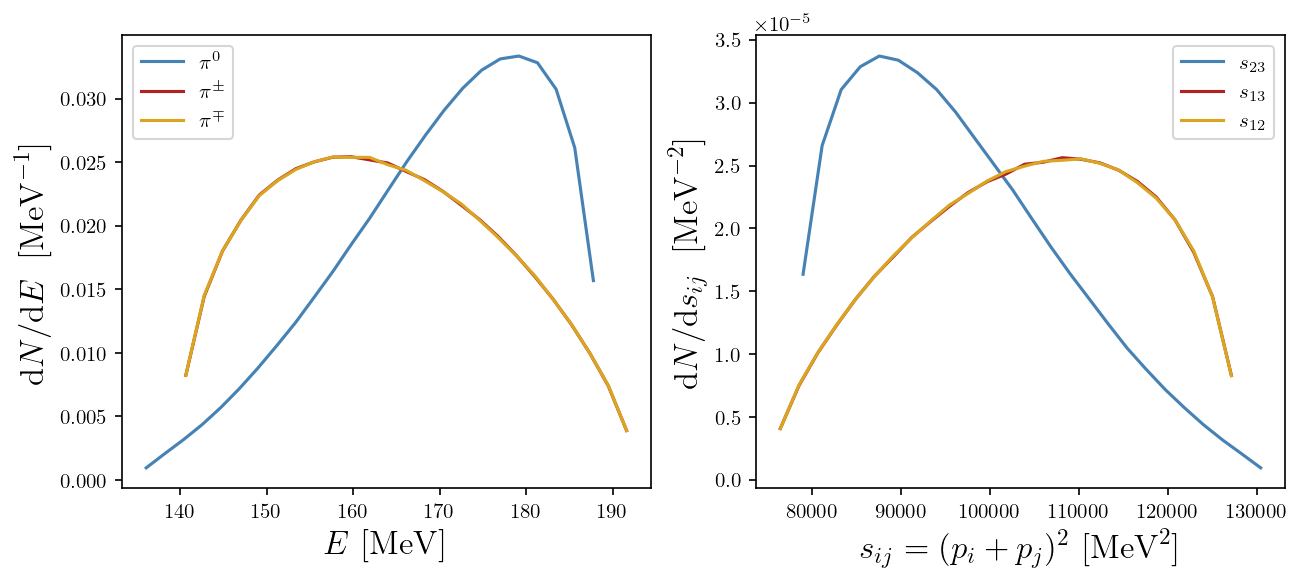

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(10,4))

labels = [r"$\pi^{0}$", r"$\pi^{\pm}$", r"$\pi^{\mp}$"]
for (cs, ps), label in zip(kl_to_pi0_pi_pi_edists, labels):
    axes[0].plot(cs, ps, label=label)

axes[0].legend()
axes[0].set_ylabel(r"$\dv*{N}{E} \ [\mathrm{MeV}^{-1}]$", fontdict={'size': 16})
axes[0].set_xlabel(r"$E \ [\mathrm{MeV}]$", fontdict={'size': 16})

labels = [r"$s_{23}$", r"$s_{13}$", r"$s_{12}$"]
dists = [kl_to_pi0_pi_pi_s_dist, kl_to_pi0_pi_pi_t_dist, kl_to_pi0_pi_pi_u_dist]
for (cs, ps), label in zip(dists, labels):
    axes[1].plot(cs, ps, label=label)

axes[1].set_ylabel(r"$\dv*{N}{s_{ij}} \ [\mathrm{MeV}^{-2}]$", fontdict={'size': 16})
axes[1].set_xlabel(r"$s_{ij} = (p_{i} + p_{j})^{2} \ [\mathrm{MeV}^{2}]$", fontdict={'size': 16})
axes[1].legend()

### $K_{L} \to \pi^{\pm} + \ell^{\mp} + \nu_{e}$

The squared matrix element was take from PDG ("Form Factors for Semileptonic Kaon, Radiative Pion and Kaon Decays"). They give the amplitude as
\begin{align*}
    \mathcal{A} = f_{+}(t)\left[(p_{k} + p_{\pi})_{\mu}\bar{\ell}\gamma_{\mu}(1+\gamma_{5})\bar{\nu}\right] 
    + f_{-}(t)\left[m_{\ell} \bar{\ell}(1+\gamma_{5})\nu\right]
\end{align*}
where $f_{\pm}$ is given by:
\begin{align*}
    f_{\pm}(t) = f_{\pm}(0)\left[1 + \lambda^{'}_{\pm} (t/m_{\pi}^{2}) + \lambda^{''}_{\pm} (t/m_{\pi}^{2})\right]
\end{align*}
with 
\begin{align*}
    \lambda_{-} &\sim 0 & &\\
    \lambda'_{+,e} &= \lambda'_{+,\mu} = 2.4 \times 10^{-2},\\
    \lambda{''}_{+,e} &= \lambda{''}_{+,\mu} = 0.20 \times 10^{-2}
\end{align*}
We will just set $f_{\pm}(0) = 1$.

In [8]:
def msqrd_kl_to_pi_e_nu(s, t):
    lp1 = 2.4e-2 
    lp2 = 0.20e-2
    fp = lambda s: 1.0 + lp1 * (s/MPI**2) + 0.5 * lp2 * (s/MPI**2)**2
    fm = lambda _: 1.0
    ml = ME
    return -4 * (
        (ml ** 4 - ml ** 2 * s) * fm(s) ** 2
        + 2 * ml ** 2 * (ml ** 2 + 2 * MPI0 ** 2 - s - 2 * t) * fm(s) * fp(s)
        + (
            ml ** 4
            + 4 * MK0 ** 2 * (MPI0 ** 2 - t)
            + 4 * t * (-(MPI0 ** 2) + s + t)
            - ml ** 2 * (s + 4 * t)
        )
        * fp(s) ** 2
    )


tbps = ThreeBodyPhaseSpace(MK0, MPI, ME, 0, msqrd_kl_to_pi_e_nu)
kl_to_pi_e_nu_edists = tbps.energy_distributions(25,maxiter=1000)
kl_to_pi_e_nu_s_dist = tbps.invariant_mass_distribution(1, 2, 25, maxiter=1000)
kl_to_pi_e_nu_t_dist = tbps.invariant_mass_distribution(0, 2, 25, maxiter=1000)
kl_to_pi_e_nu_u_dist = tbps.invariant_mass_distribution(0, 1, 25, maxiter=1000)

In [9]:
def msqrd_kl_to_pi_mu_nu(s, t):
    lp1 = 2.4e-2 
    lp2 = 0.20e-2
    fp = lambda s: 1.0 + lp1 * (s/MPI**2) + 0.5 * lp2 * (s/MPI**2)**2
    fm = lambda _: 1.0
    ml = MMU
    return -4 * (
        (ml ** 4 - ml ** 2 * s) * fm(s) ** 2
        + 2 * ml ** 2 * (ml ** 2 + 2 * MPI0 ** 2 - s - 2 * t) * fm(s) * fp(s)
        + (
            ml ** 4
            + 4 * MK0 ** 2 * (MPI0 ** 2 - t)
            + 4 * t * (-(MPI0 ** 2) + s + t)
            - ml ** 2 * (s + 4 * t)
        )
        * fp(s) ** 2
    )

tbps = ThreeBodyPhaseSpace(MK0, MPI, MMU, 0, msqrd_kl_to_pi_mu_nu)
kl_to_pi_mu_nu_edists = tbps.energy_distributions(25,maxiter=1000)
kl_to_pi_mu_nu_s_dist = tbps.invariant_mass_distribution(1, 2, 25, maxiter=1000)
kl_to_pi_mu_nu_t_dist = tbps.invariant_mass_distribution(0, 2, 25, maxiter=1000)
kl_to_pi_mu_nu_u_dist = tbps.invariant_mass_distribution(0, 1, 25, maxiter=1000)

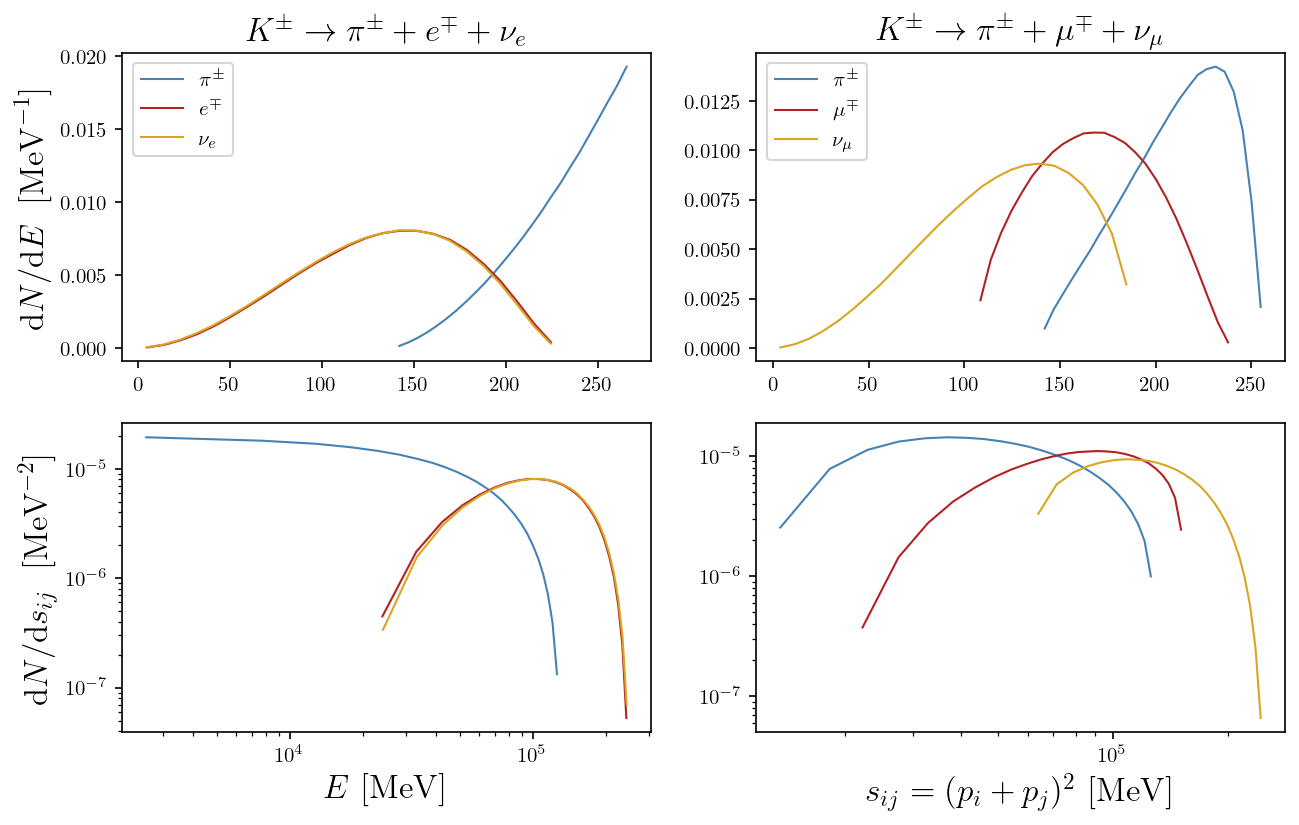

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6), dpi=150)

labels = [r"$\pi^{\pm}$", r"$e^{\mp}$", r"$\nu_{e}$"]
for (cs, ps), label in zip(kl_to_pi_e_nu_edists, labels):
    axes[0][0].plot(cs, ps, label=label, lw=1)

labels = [r"$\pi^{\pm}$", r"$\mu^{\mp}$", r"$\nu_{\mu}$"]
for (cs, ps), label in zip(kl_to_pi_mu_nu_edists, labels):
    axes[0][1].plot(cs, ps, label=label, lw=1)


labels = [r"$s_{23}$", r"$s_{13}$", r"$s_{12}$"]
dists = [kl_to_pi_e_nu_s_dist, kl_to_pi_e_nu_t_dist, kl_to_pi_e_nu_u_dist]
for (cs, ps), label in zip(dists, labels):
    axes[1][0].plot(cs, ps, label=label, lw=1)

labels = [r"$s_{23}$", r"$s_{13}$", r"$s_{12}$"]
dists = [kl_to_pi_mu_nu_s_dist, kl_to_pi_mu_nu_t_dist, kl_to_pi_mu_nu_u_dist]
for (cs, ps), label in zip(dists, labels):
    axes[1][1].plot(cs, ps, label=label, lw=1)

axes[0][0].set_title(r"$K^{\pm} \to \pi^{\pm} + e^{\mp} + \nu_{e}$", fontdict={"size":16})
axes[0][1].set_title(r"$K^{\pm} \to \pi^{\pm} + \mu^{\mp} + \nu_{\mu}$", fontdict={"size":16})

axes[0][0].set_ylabel(r"$\dv*{N}{E} \ [\mathrm{MeV}^{-1}]$", fontdict={"size":16})
axes[1][0].set_ylabel(r"$\dv*{N}{s_{ij}} \ [\mathrm{MeV}^{-2}]$", fontdict={"size":16})

axes[1][0].set_xlabel(r"$E \ [\mathrm{MeV}]$", fontdict={"size":16})
axes[1][1].set_xlabel(r"$s_{ij} = (p_{i} + p_{j})^{2} \ [\mathrm{MeV}]$", fontdict={"size":16})


axes[0][0].legend()
axes[0][1].legend()


axes[1][0].set_xscale("log")
axes[1][1].set_xscale("log")
axes[1][0].set_yscale("log")
axes[1][1].set_yscale("log")

# axes[1].set_ylabel(r"$\dv*{N}{s_{ij}} \ [\mathrm{MeV}^{-2}]$", fontdict={'size': 16})
# axes[1].set_xlabel(r"$s_{ij} = (p_{i} + p_{j})^{2} \ [\mathrm{MeV}^{2}]$", fontdict={'size': 16})
# axes[1].legend()

# ax1.legend()
# ax2.legend()

### Save Data

In [14]:
with h5py.File(Path(os.getcwd()).joinpath("data").joinpath("klong_decay_data.hdf5"), "w") as f:
    # K -> pi + pi + pi
    root = f.create_group("/pi0_pi0_pi0")
    grp = root.create_group("energy_distributions")
    d1, d2, d3 = kl_to_pi0_pi0_pi0_edists
    sdist = kl_to_pi0_pi0_pi0_s_dist
    tdist = kl_to_pi0_pi0_pi0_t_dist
    udist = kl_to_pi0_pi0_pi0_u_dist

    grp.create_dataset("energies", data=np.vstack((d1[0], d2[0], d3[0])))
    grp.create_dataset("probabilities", data=np.vstack((d1[1], d2[1], d3[1])))

    grp = root.create_group("invariant_mass_distributions/s")
    grp.create_dataset("invariant_masses", data=sdist[0])
    grp.create_dataset("probabilities", data=sdist[1])

    grp = root.create_group("invariant_mass_distributions/t")
    grp.create_dataset("invariant_masses", data=tdist[0])
    grp.create_dataset("probabilities", data=tdist[1])
    
    grp = root.create_group("invariant_mass_distributions/u")
    grp.create_dataset("invariant_masses", data=udist[0])
    grp.create_dataset("probabilities", data=udist[1])

    # KL -> pi0 + pi + pi
    root = f.create_group("/pi0_pi_pi")
    grp = root.create_group("energy_distributions")
    d1, d2, d3 = kl_to_pi0_pi_pi_edists
    sdist = kl_to_pi0_pi_pi_s_dist
    tdist = kl_to_pi0_pi_pi_t_dist
    udist = kl_to_pi0_pi_pi_u_dist

    grp.create_dataset("energies", data=np.vstack((d1[0], d2[0], d3[0])))
    grp.create_dataset("probabilities", data=np.vstack((d1[1], d2[1], d3[1])))

    grp = root.create_group("invariant_mass_distributions/s")
    grp.create_dataset("invariant_masses", data=sdist[0])
    grp.create_dataset("probabilities", data=sdist[1])

    grp = root.create_group("invariant_mass_distributions/t")
    grp.create_dataset("invariant_masses", data=tdist[0])
    grp.create_dataset("probabilities", data=tdist[1])
    
    grp = root.create_group("invariant_mass_distributions/u")
    grp.create_dataset("invariant_masses", data=udist[0])
    grp.create_dataset("probabilities", data=udist[1])

    # K -> pi + e + nu
    root = f.create_group("/pi_e_nu")
    grp = root.create_group("energy_distributions")
    d1, d2, d3 = kl_to_pi_e_nu_edists
    sdist = kl_to_pi_e_nu_s_dist
    tdist = kl_to_pi_e_nu_t_dist
    udist = kl_to_pi_e_nu_u_dist

    grp.create_dataset("energies", data=np.vstack((d1[0], d2[0], d3[0])))
    grp.create_dataset("probabilities", data=np.vstack((d1[1], d2[1], d3[1])))

    grp = root.create_group("invariant_mass_distributions/s")
    grp.create_dataset("invariant_masses", data=sdist[0])
    grp.create_dataset("probabilities", data=sdist[1])

    grp = root.create_group("invariant_mass_distributions/t")
    grp.create_dataset("invariant_masses", data=tdist[0])
    grp.create_dataset("probabilities", data=tdist[1])
    
    grp = root.create_group("invariant_mass_distributions/u")
    grp.create_dataset("invariant_masses", data=udist[0])
    grp.create_dataset("probabilities", data=udist[1])

    # K -> pi + mu + nu
    root = f.create_group("/pi_mu_nu")
    grp = root.create_group("energy_distributions")
    d1, d2, d3 = kl_to_pi_mu_nu_edists
    sdist = kl_to_pi_mu_nu_s_dist
    tdist = kl_to_pi_mu_nu_t_dist
    udist = kl_to_pi_mu_nu_u_dist

    grp.create_dataset("energies", data=np.vstack((d1[0], d2[0], d3[0])))
    grp.create_dataset("probabilities", data=np.vstack((d1[1], d2[1], d3[1])))

    grp = root.create_group("invariant_mass_distributions/s")
    grp.create_dataset("invariant_masses", data=sdist[0])
    grp.create_dataset("probabilities", data=sdist[1])

    grp = root.create_group("invariant_mass_distributions/t")
    grp.create_dataset("invariant_masses", data=tdist[0])
    grp.create_dataset("probabilities", data=tdist[1])
    
    grp = root.create_group("invariant_mass_distributions/u")
    grp.create_dataset("invariant_masses", data=udist[0])
    grp.create_dataset("probabilities", data=udist[1])

## Photon Spectra

In [3]:
class LongKaonSpectra:

    def __init__(self):
        file = Path(os.getcwd()).joinpath("data").joinpath("klong_decay_data.hdf5")
        with h5py.File(file, "r") as f:
            self._edists = {
                "pi0 pi0 pi0": {
                    "e": f["/pi0_pi0_pi0/energy_distributions/energies"][:],
                    "dnde": f["/pi0_pi0_pi0/energy_distributions/probabilities"][:],
                },
                "pi0 pi pi": {
                    "e": f["/pi0_pi_pi/energy_distributions/energies"][:],
                    "dnde": f["/pi0_pi_pi/energy_distributions/probabilities"][:],
                },
                "pi e nu": {
                    "e": f["/pi_e_nu/energy_distributions/energies"][:],
                    "dnde": f["/pi_e_nu/energy_distributions/probabilities"][:],
                },
                "pi mu nu": {
                    "e": f["/pi_mu_nu/energy_distributions/energies"][:],
                    "dnde": f["/pi_mu_nu/energy_distributions/probabilities"][:],
                },
            }
            self._invariant_mass_dists = {
                "pi0 pi0 pi0": {
                    "s":    f["/pi0_pi0_pi0/invariant_mass_distributions/s/invariant_masses"][:],
                    "t":    f["/pi0_pi0_pi0/invariant_mass_distributions/t/invariant_masses"][:],
                    "u":    f["/pi0_pi0_pi0/invariant_mass_distributions/u/invariant_masses"][:],
                    "dnds": f["/pi0_pi0_pi0/invariant_mass_distributions/s/probabilities"][:],
                    "dndt": f["/pi0_pi0_pi0/invariant_mass_distributions/t/probabilities"][:],
                    "dndu": f["/pi0_pi0_pi0/invariant_mass_distributions/u/probabilities"][:],
                },
                "pi0 pi pi": {
                    "s":    f["/pi0_pi_pi/invariant_mass_distributions/s/invariant_masses"][:],
                    "t":    f["/pi0_pi_pi/invariant_mass_distributions/t/invariant_masses"][:],
                    "u":    f["/pi0_pi_pi/invariant_mass_distributions/u/invariant_masses"][:],
                    "dnds": f["/pi0_pi_pi/invariant_mass_distributions/s/probabilities"][:],
                    "dndt": f["/pi0_pi_pi/invariant_mass_distributions/t/probabilities"][:],
                    "dndu": f["/pi0_pi_pi/invariant_mass_distributions/u/probabilities"][:],
                },
                "pi e nu": {
                    "s":    f["/pi_e_nu/invariant_mass_distributions/s/invariant_masses"][:],
                    "t":    f["/pi_e_nu/invariant_mass_distributions/t/invariant_masses"][:],
                    "u":    f["/pi_e_nu/invariant_mass_distributions/u/invariant_masses"][:],
                    "dnds": f["/pi_e_nu/invariant_mass_distributions/s/probabilities"][:],
                    "dndt": f["/pi_e_nu/invariant_mass_distributions/t/probabilities"][:],
                    "dndu": f["/pi_e_nu/invariant_mass_distributions/u/probabilities"][:],
                },
                "pi mu nu": {
                    "s":    f["/pi_mu_nu/invariant_mass_distributions/s/invariant_masses"][:],
                    "t":    f["/pi_mu_nu/invariant_mass_distributions/t/invariant_masses"][:],
                    "u":    f["/pi_mu_nu/invariant_mass_distributions/u/invariant_masses"][:],
                    "dnds": f["/pi_mu_nu/invariant_mass_distributions/s/probabilities"][:],
                    "dndt": f["/pi_mu_nu/invariant_mass_distributions/t/probabilities"][:],
                    "dndu": f["/pi_mu_nu/invariant_mass_distributions/u/probabilities"][:],
                },
            }


    def dnde_photon_pi0_pi0_pi0(self, e):
        res = np.zeros_like(e)
        dists = self._edists["pi0 pi0 pi0"]
        res += utils.convolve(e, dnde_np, dists["e"][0], dists["dnde"][0])
        res += utils.convolve(e, dnde_np, dists["e"][1], dists["dnde"][1])
        res += utils.convolve(e, dnde_np, dists["e"][2], dists["dnde"][2])
        
        return res

    def dnde_photon_pi0_pi_pi(self, e):
        key = "pi0 pi pi"

        res = np.zeros_like(e)
        dists = self._edists[key]
        res += utils.convolve(e, dnde_np, dists["e"][0], dists["dnde"][0])
        res += utils.convolve(e, dnde_cp, dists["e"][1], dists["dnde"][1])
        res += utils.convolve(e, dnde_cp, dists["e"][2], dists["dnde"][2])

        # Average FSR over s, t and u channels 
        fsr = lambda x, y: utils.dnde_photon_fsr_scalar(x, y, MPI, q=1.0)
        inv_dist = self._invariant_mass_dists[key]
        res += 0.5 * utils.convolve(e, fsr, inv_dist["s"], inv_dist["dnds"])
        res += 0.5 * utils.convolve(e, fsr, inv_dist["t"], inv_dist["dndt"])
        res += 0.5 * utils.convolve(e, fsr, inv_dist["u"], inv_dist["dndu"])

        return res

    def dnde_photon_pi_e_nu(self, e):
        key = "pi e nu"

        res = np.zeros_like(e)
        dists = self._edists[key]
        res += utils.convolve(e, dnde_cp, dists["e"][0], dists["dnde"][0])

        # Average FSR over s, t and u channels 
        fsre = lambda x, y: utils.dnde_photon_fsr_fermion(x, y, ME, q=-1.0)
        fsrp = lambda x, y: utils.dnde_photon_fsr_scalar(x, y, MPI, q=1.0)
        inv_dist = self._invariant_mass_dists[key]
        res += 0.5 * utils.convolve(e, fsre, inv_dist["s"], inv_dist["dnds"]) 
        res += 0.5 * utils.convolve(e, fsrp, inv_dist["t"], inv_dist["dndt"])
        res += 0.5 * (
            utils.convolve(e, fsre, inv_dist["u"], inv_dist["dndu"]) 
            + utils.convolve(e, fsrp, inv_dist["u"], inv_dist["dndu"])
        )

        return res

    def dnde_photon_pi_mu_nu(self, e):
        key = "pi mu nu"

        res = np.zeros_like(e)
        dists = self._edists[key]
        res += utils.convolve(e, dnde_cp, dists["e"][0], dists["dnde"][0])
        res += utils.convolve(e, dnde_mu, dists["e"][1], dists["dnde"][1])

        # Average FSR over s and u channels 
        fsrm = lambda x, y: utils.dnde_photon_fsr_fermion(x, y, MMU, q=-1.0)
        fsrp = lambda x, y: utils.dnde_photon_fsr_scalar(x, y, MPI, q=1.0)
        inv_dist = self._invariant_mass_dists[key]
        res += 0.5 * utils.convolve(e, fsrm, inv_dist["s"], inv_dist["dnds"]) 
        res += 0.5 * utils.convolve(e, fsrp, inv_dist["t"], inv_dist["dndt"])
        res += 0.5 * (
            utils.convolve(e, fsrm, inv_dist["u"], inv_dist["dndu"]) 
            + utils.convolve(e, fsrp, inv_dist["u"], inv_dist["dndu"])
        )

        return res

    def dnde_photon(self, e, components=False):
        pi0_pi0_pi0 = BR_KL_TO_PI0_PI0_PI0 * self.dnde_photon_pi0_pi0_pi0(e)
        pi0_pi_pi = BR_KL_TO_PI_PI_PI0 * self.dnde_photon_pi0_pi_pi(e)
        pi_e_nu = BR_KL_TO_PI_E_NUE * self.dnde_photon_pi_e_nu(e)
        pi_mu_nu = BR_KL_TO_PI_MU_NUMU * self.dnde_photon_pi_mu_nu(e)

        if components:
            return {
                "pi0 pi0 pi0": pi0_pi0_pi0,
                "pi e nu": pi_e_nu,
                "pi mu nu": pi_mu_nu,
                "pi0 pi pi": pi0_pi_pi,
            }
        return pi0_pi0_pi0 + pi0_pi_pi + pi_e_nu + pi_mu_nu

/home/logan/github/Hazma/hazma/decay.py:208: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/notebooks/decay_spectra/utils.py:63: RuntimeWarning: invalid value encountered in log
  np.e * m ** 2 / s > xm, 0.0, 2.0 * xm / x * (np.log(s * xm / m ** 2) - 1.0)
/home/logan/github/Hazma/notebooks/decay_spectra/utils.py:69: RuntimeWarning: invalid value encountered in log
  (1.0 + xm ** 2) / x * (np.log(s * xm / m ** 2) - 1.0),


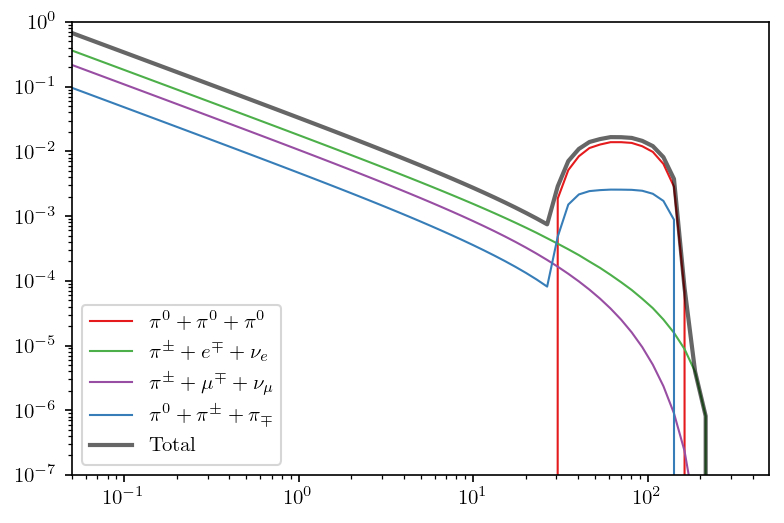

In [4]:
labels = {
    "pi0 pi0 pi0" : r"$\pi^{0} + \pi^{0} + \pi^{0}$",
    "pi0 pi pi" : r"$\pi^{0} + \pi^{\pm} + \pi_{\mp}$",
    "pi e nu" : r"$\pi^{\pm} + e^{\mp} + \nu_{e}$",
    "pi mu nu" : r"$\pi^{\pm} + \mu^{\mp} + \nu_{\mu}$",
    "total": r"$\mathrm{Total}$"
}

plot_params = {
    "pi0 pi0 pi0" : {"c": utils.qualitative[0], "lw": 1},
    "pi0 pi pi" : {"c": utils.qualitative[1], "lw": 1},
    "pi e nu" : {"c": utils.qualitative[2], "lw": 1},
    "pi mu nu" :{"c": utils.qualitative[3], "lw": 1},
    "total": {"c": "k", "lw": 2, "alpha": 0.6},
}

es = MK0 * np.geomspace(1e-6, 1.0, 100)
dnde_ck = LongKaonSpectra().dnde_photon(es, components=True)

plt.figure(dpi=150)

for key, val in dnde_ck.items():
    plt.plot(es, val, label=labels[key], **plot_params[key])
plt.plot(es, sum(dnde_ck.values()), label=labels["total"], **plot_params["total"])



plt.ylim(1e-7, 1e0)
plt.xlim(np.max(es) * 1e-4, np.max(es))
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [8]:
es = MK0 * np.geomspace(1e-6, 1.0, 500)
dnde_kl = sum(LongKaonSpectra().dnde_photon(es, components=True).values())

s = slice(0, np.argwhere(dnde_kl <= 0)[0,0])
data = np.array([es[s], dnde_kl[s]]).T

np.savetxt(Path(os.getcwd()).joinpath("data").joinpath("kl_dnde_photon.csv"), data, delimiter=",", header="energy, dnde")